# Acoustic Testing

In [2]:
import numpy as np
import matplotlib as mplt
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams.update({'figure.autolayout':True})

Material: PIC255 

$g_{31} = -11.3$ $10^{-3}\, Vm/N$  $\hspace{1em}$ $g_{33} = 25$ $10^{-3} \, Vm/N$

$N_{P} = N_{t} = 2000$

Then we know the radial and thickness resonance frequencies:
$$ f_{r} = \frac{N_{p}}{\text{OD}} \hspace{2em} f_{t} = \frac{N_{t}}{\text{TH}}$$.

These are just for the piezos, and it changes when looking at the full housing. According to Roxanne's thesis, with the housing (16 mm OD and 3 mm thickness) they get a 10.5 kHz resonance. So that should be kept in mind for these values.

We can plot these functions out for different thicknesses and OD. 

In [3]:
def fr(od, Np):
    return Np/od

def ft(th, Nt):
    return Nt/th

Text(0.5, 0, 'OD (mm)')

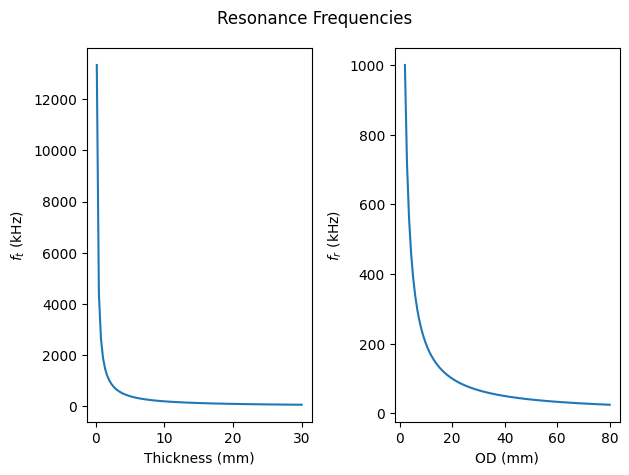

In [6]:
ths = np.linspace(0.15, 30, 100)
ods = np.linspace(2, 80, 100)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Resonance Frequencies')
ax1.plot(ths, ft(ths, np.ones(len(ths))*2000))
ax2.plot(ods, ft(ods, np.ones(len(ods))*2000))
ax1.set_ylabel(r'$f_{t}$ (kHz)')
ax2.set_ylabel(r'$f_{r}$ (kHz)')
ax1.set_xlabel('Thickness (mm)')
ax2.set_xlabel('OD (mm)')

We can also explore the force-voltage relationship. This could give us an idea of the force required to induce a voltage on our piezos. First, note that
$$ V = -\frac{4g_{33}\text{TH}}{\pi \text{OD}^{2}}F \, ,$$
where $F$ is the force experienced by the piezo. Suppose we know some cut-off Voltage we need to have a signal, call it $V_{\text{min}}$, then we could find the minimum corresponding force we would need, $F_{\text{min}}$ as :
$$ -\frac{\pi \text{OD}^{2}}{4g_{33}\text{TH}}V_{\text{min}} = F_{\text{min}}. $$
Then, for varying OD and TH we can find the minimum force we would need for a detection. 

In [9]:
g33 = 25e-3 #Vm/N

def F(V, th, od):
    den = 4*g33*(th*1e-3)
    num = np.pi*od*od*1e-6
    return -(num/den)*V


Text(0.5, 0, 'OD (mm)')

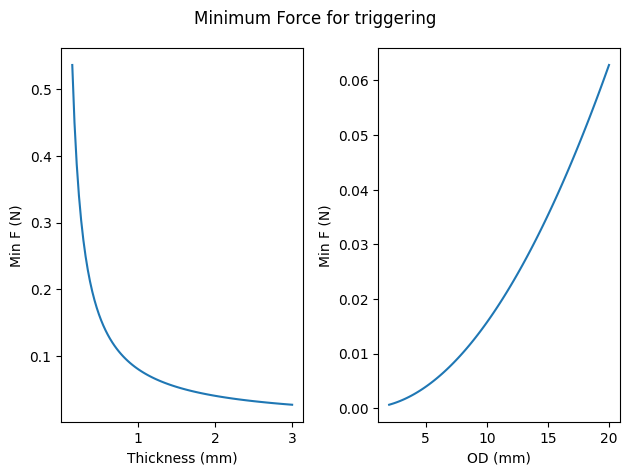

In [10]:
V_min = -10e-3 # V ----------- We assume 10 mV is the minimum required. Negative is to take care of negative in the equation.
ths = np.linspace(0.15, 3, 100)
ods = np.linspace(2, 20, 100)
th = 2*np.ones(len(ths))
od = 16*np.ones(len(ods))
V = V_min*np.ones(len(th))


fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Minimum Force for triggering')
ax1.plot(ths, F(V, ths, od))
ax2.plot(ods, F(V, th, ods))
ax1.set_ylabel(r'Min F (N)')
ax2.set_ylabel(r'Min F (N)')
ax1.set_xlabel('Thickness (mm)')
ax2.set_xlabel('OD (mm)')

We define SPL (Sound Pressure Level) as
$$SPL = 20\log_{10}(A_{p}/1\, \mu \text{Pa})$$
where $A_{p}$ is the amplitude of the wave. This has units of dB re 1 $\mu$Pa. For simplicity let's use this reference pressure as given (ignoring that our pressure will vary with depth). Then given a surface area and force, we can in theory compute the furthest distance an emitter with a particular SPL can be while still achieving a signal. In particular, suppose a device emmits at an SPL of $SPL_{0}$ at a distance $r_{0} = 1$ meter (at a particular density). Then, assuming isotropic emmission,
$$SPL = \frac{SPL_{0}}{r^{2}}.$$
Hence, we get
$$\frac{SPL_{0}}{r^{2}} = 20\log_{10}(A_{p}/1\, \mu \text{Pa})$$
$$r = \sqrt{\frac{SPL_{0}}{20\log_{10}(A_{p}/1\, \mu \text{Pa})}}.$$
Finally we know $A_{p}$ will be some function of $F$, thickness and OD. Assume the force is normal to the larger surface, so the area only depends on OD. Then
$$
A_{p} = \frac{F(th, OD)}{OD^{2}/4\pi} \\
A_{p} = \frac{4\pi F(th, OD)}{OD^{2}} \\
A_{p} = -\frac{\pi \text{OD}^{2}}{4g_{33}\text{TH}}V_{\text{min}}\frac{4\pi}{OD^{2}} \\
A_{p} = -\frac{\pi^{2}}{g_{33}\text{TH}}V_{\text{min}}.
$$
Then we see that
$$
r_\text{max} =  \sqrt{\frac{SPL_{0}}{20\log_{10}(-\frac{\pi^{2}}{g_{33}\text{TH}}V_{\text{min}}/1\, \mu \text{Pa})}}
$$

In [4]:
g33 = 25e-3 #Vm/N

def r_m(th, spl, Vmin):
    muPa = 1e-6 # Pascals (N/m^2)
    inlog = -np.pi*np.pi*Vmin/(g33*th*1e-3*muPa)
    denom = 20*np.log10(inlog)
    return np.sqrt(spl/denom)

Text(0.5, 0, 'Thickness (mm)')

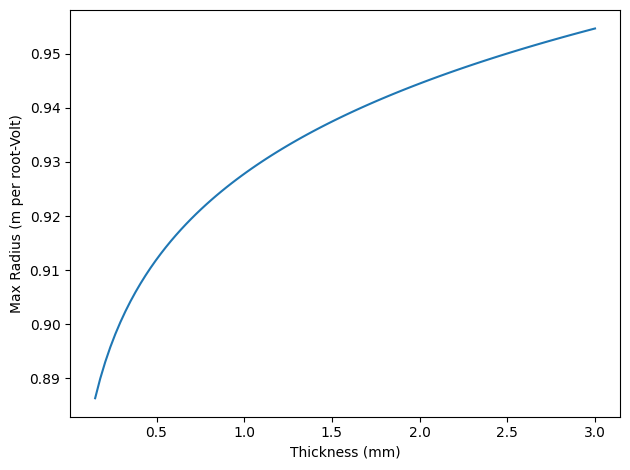

In [5]:
V_min = -10e-4 # V ----------- We assume 10 mV is the minimum required. Negative is to take care of negative in the equation.
SPL = 148 #dB re 1 micro Pascal per Volt at 1 meter

ths = np.linspace(0.15, 3, 100)
vmins = V_min*np.ones(len(ths))
spls = SPL*np.ones(len(ths))

fig = plt.figure()
plt.plot(ths, r_m(ths, spls, vmins))
plt.ylabel(r'Max Radius (m per root-Volt)')
plt.xlabel(r'Thickness (mm)')


In [3]:
np.sqrt(300)

17.320508075688775